In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.abspath("../.."))
from configs.general import GeneralConfig
import seaborn as sns
species_of_interest = [
    "H",
    "H2",
    "O",
    "C",
    "N",
    "CL",
    "E_minus",
    "CO",
    "MG",
    "#C",
    "H2O",
    "SI",
]
physical_params = {
    "Density": "n_H / cm^3",
    "gasTemp": "K",
    "Av": "mag",
    "Radfield": "habing",
}

In [3]:
df = pd.read_hdf("../../data/grav_collapse_clean.h5", key="val")
df

,Index,Model,Time,Density,Radfield,Av,gasTemp,#C,#C2,#C2H,...,SIH5+,SIO,SIO+,SIOH+,SIS,SIS+,SO,SO+,SO2,SO2+
0,594,2.0,0.0,2.471193e+06,0.000100,122.304202,13.316765,1.000000e-30,1.000000e-30,1.000000e-30,...,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30,1.000000e-30
1,595,2.0,92.9,2.471245e+06,0.000893,119.686260,37.272744,2.813550e-13,6.056061e-11,1.919478e-15,...,3.909999e-17,3.848474e-07,1.549187e-13,3.260137e-10,4.504716e-11,3.829415e-17,1.557687e-13,1.539742e-14,1.127069e-17,4.943645e-26
2,596,2.0,185.8,2.471405e+06,0.002462,120.643656,37.273202,1.330024e-13,2.803234e-10,2.961034e-13,...,2.443958e-13,5.780698e-07,1.466270e-14,1.820768e-09,1.443427e-10,5.267001e-18,1.121715e-12,3.376170e-12,1.724015e-17,4.188084e-26
3,597,2.0,278.7,2.471670e+06,0.004076,131.574973,37.273966,1.781387e-13,3.408449e-10,4.671095e-13,...,2.950991e-13,5.895586e-07,8.385838e-15,2.892375e-09,1.891399e-10,6.995355e-18,1.890156e-12,3.770928e-12,2.900173e-17,6.765509e-26
4,598,2.0,371.6,2.472039e+06,0.006141,132.060001,37.275035,2.387678e-13,4.145124e-10,7.088585e-13,...,2.952988e-13,5.804863e-07,5.375523e-15,3.499727e-09,2.113931e-10,9.369751e-18,2.328810e-12,3.792042e-12,3.572433e-17,8.825884e-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889213,2963758,9978.0,27126.8,7.763906e+04,0.004172,4.395878,28.220272,1.993537e-14,9.905272e-10,1.823899e-11,...,7.428627e-14,3.570409e-08,3.374260e-16,2.323992e-10,2.944902e-12,1.366942e-14,6.448945e-12,1.881876e-11,2.166335e-14,2.056398e-20
889214,2963759,9978.0,27219.7,7.710364e+04,0.004286,2.907921,28.196477,1.911747e-14,9.899456e-10,1.826711e-11,...,7.393906e-14,3.563371e-08,3.354582e-16,2.311452e-10,2.911839e-12,1.357824e-14,6.466022e-12,1.876441e-11,2.158776e-14,2.064687e-20
889215,2963760,9978.0,27312.6,7.657411e+04,0.009786,1.173676,28.172518,1.839867e-14,9.893626e-10,1.829151e-11,...,7.357795e-14,3.556663e-08,3.423802e-16,2.304969e-10,2.879267e-12,1.348634e-14,6.482933e-12,1.865966e-11,2.151327e-14,2.073020e-20
889216,2963761,9978.0,27405.5,7.605042e+04,0.005952,5.029348,28.148750,2.276693e-14,9.887758e-10,1.832739e-11,...,7.232625e-14,3.574368e-08,7.269153e-16,2.357076e-10,2.853023e-12,1.333271e-14,6.486427e-12,2.005257e-11,2.141177e-14,2.135194e-20


In [3]:
for key in physical_params.keys():
    print(f"{key} | Min: {df[key].min()} | Max: {df[key].max()}")

Density | Min: 70163.86655175312 | Max: 1253950201.0989578
gasTemp | Min: 13.316763182026596 | Max: 131.79457838068538
Av | Min: 0.8159086172376786 | Max: 6727.51046148846
Radfield | Min: 0.0001 | Max: 5.820983522293255


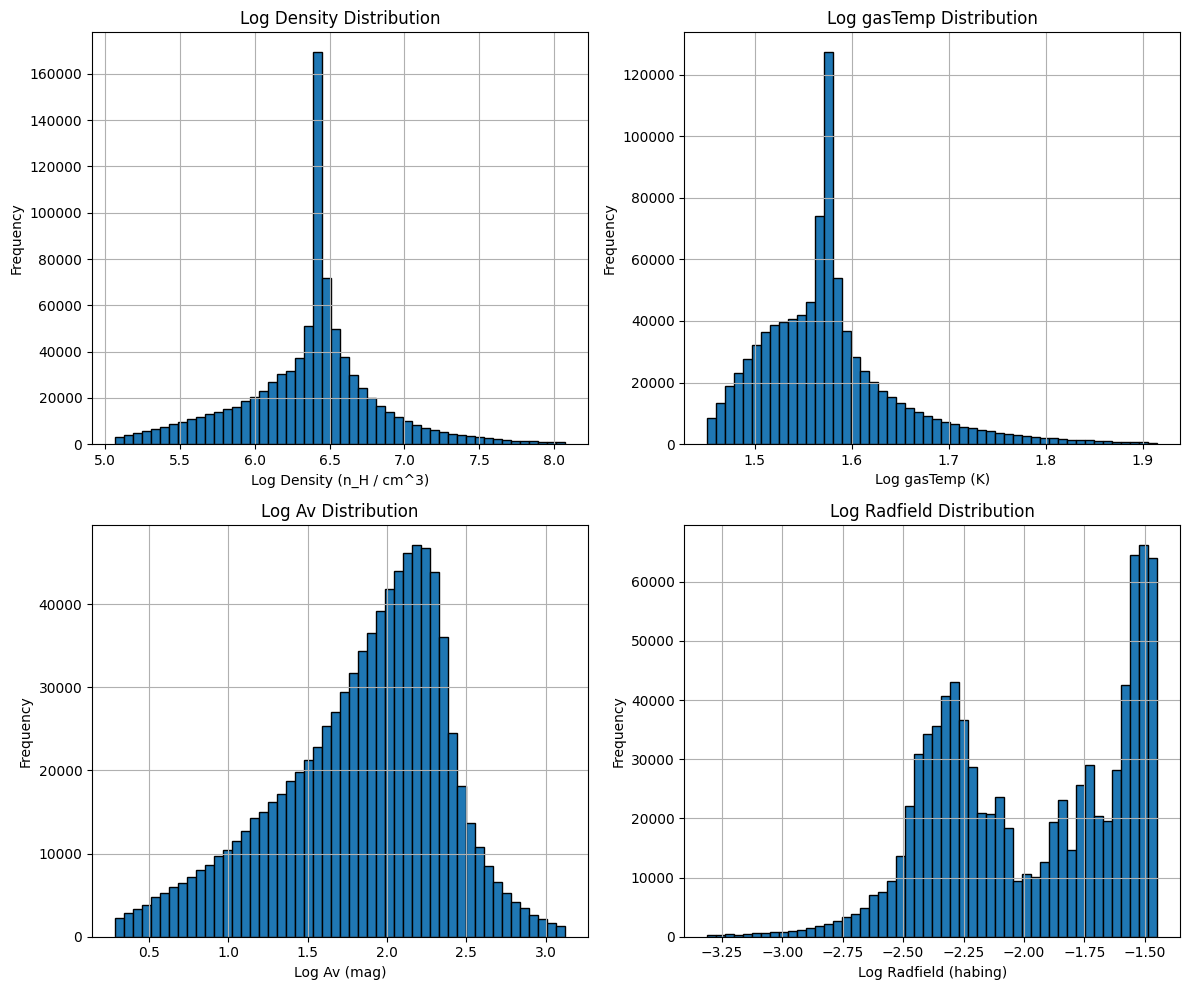


Descriptive stats for Log Density (n_H / cm^3):
count    880324.000000
mean          6.364133
std           0.457945
min           5.065017
25%           6.148068
50%           6.402631
75%           6.566686
max           8.071501
Name: Density, dtype: float64

Descriptive stats for Log gasTemp (K):
count    880324.000000
mean          1.576197
std           0.071470
min           1.450625
25%           1.530053
50%           1.571405
75%           1.599550
max           1.915195
Name: gasTemp, dtype: float64

Descriptive stats for Log Av (mag):
count    880324.000000
mean          1.841316
std           0.530546
min           0.282154
25%           1.517554
50%           1.940246
75%           2.224433
max           3.121937
Name: Av, dtype: float64

Descriptive stats for Log Radfield (habing):
count    880324.000000
mean         -1.978537
std           0.388653
min          -3.311574
25%          -2.311697
50%          -1.968928
75%          -1.581781
max          -1.447248
Name: R

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, (column, unit) in enumerate(physical_params.items()):
    col_data = np.log10(df[column].dropna())
    lower = col_data.quantile(0.005)
    upper = col_data.quantile(0.995)

    filtered_data = col_data[(col_data >= lower) & (col_data <= upper)]

    axes[idx].hist(filtered_data, bins=50, edgecolor="k")
    axes[idx].set_title(f"Log {column} Distribution")
    axes[idx].set_xlabel(f"Log {column} ({unit})")
    axes[idx].set_ylabel("Frequency")
    axes[idx].grid(True)

plt.tight_layout()
plt.show()

for column, unit in physical_params.items():
    col_data = np.log10(df[column].dropna())
    lower = col_data.quantile(0.005)
    upper = col_data.quantile(0.995)

    filtered_data = col_data[(col_data >= lower) & (col_data <= upper)]

    print(f"\nDescriptive stats for Log {column} ({unit}):")
    print(filtered_data.describe())

C:\Users\carlo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)
C:\Users\carlo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


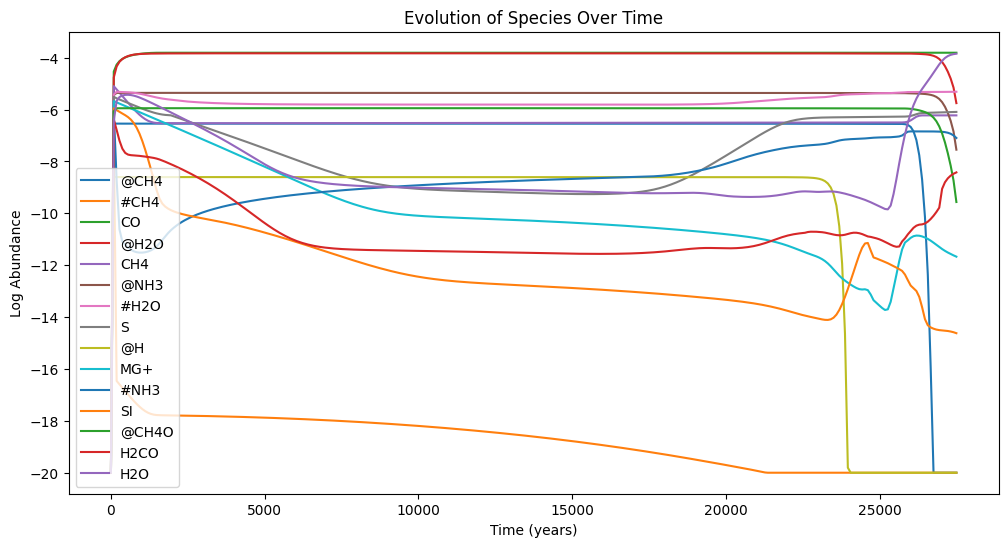

In [9]:
df_tracer = df[df["Model"] == 15]

df_diff = np.log10(df_tracer).diff()

col_variation = df_diff.std()

most_variable_cols = col_variation.nlargest(15)

species_of_interest = most_variable_cols.index.tolist()

fig, ax = plt.subplots(figsize=(12, 6))

for species in species_of_interest:
    if species in df_tracer.columns:
        log_abundance = np.log10(df_tracer[species].replace(0, np.nan))
        log_abundance = np.maximum(log_abundance, -20)
        ax.plot(df_tracer["Time"], log_abundance, label=species)

ax.set_xlabel("Time (years)")
ax.set_ylabel("Log Abundance")
ax.set_title("Evolution of Species Over Time")
ax.legend()
plt.show()

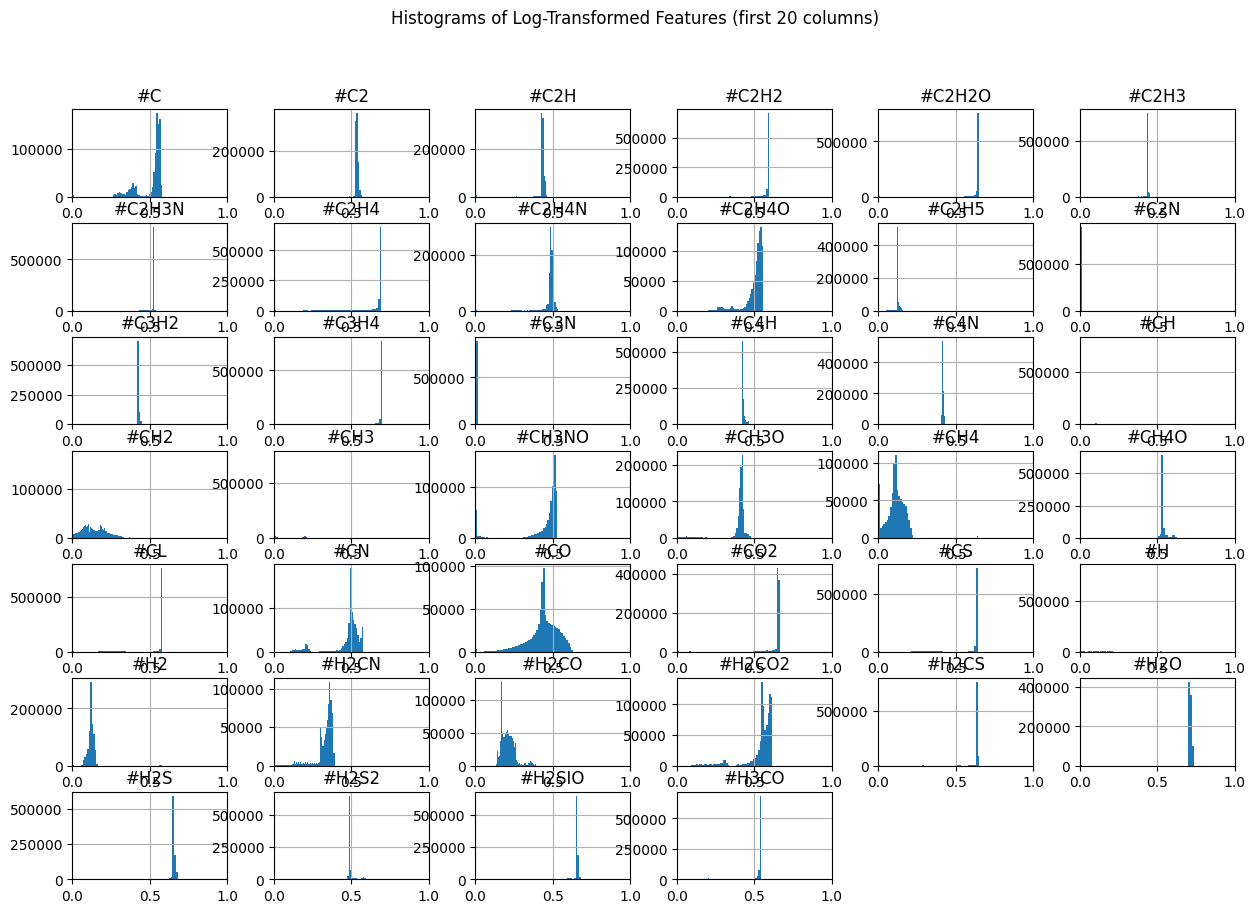

In [22]:
log_df = (np.log10(df[GeneralConfig.species]) + 20) / 20
log_df = log_df.clip(0, 1)

subset_cols = log_df.columns[:40]
log_df[subset_cols].hist(bins=60, figsize=(15, 10))
plt.suptitle("Histograms of Log-Transformed Features (first 20 columns)")
for ax in plt.gcf().axes:
    ax.set_xlim(0, 1)
plt.show()